In [206]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Exploration and Preparation

### Load Dataset and Intial Exploration:

In [207]:
# Load the 'mnist_train' Data
mnist_train_data = pd.read_csv("mnist_train.csv")

mnist_train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
# Identify the number of unique labels
unique_classes = mnist_train_data["label"].unique()
num_unique_classes = mnist_train_data["label"].nunique()
print("Number of unique classes: ", num_unique_classes)
print("Unique classes: ", unique_classes)

Number of unique classes:  10
Unique classes:  [5 0 4 1 9 2 3 6 7 8]


In [209]:
# Identify the number of features
num_features = mnist_train_data.shape[1] - 1  # exclude the label column
print("Number of features: ", num_features)

Number of features:  784


In [210]:
# Check for missing values
num_missing_values = mnist_train_data.isnull().sum()
num_missing_values_all = mnist_train_data.isnull().sum().sum()
print("Number of missing values: ", num_missing_values_all)
print("----------------------------------------")
print("Number of missing values for every column:\n", num_missing_values)

Number of missing values:  0
----------------------------------------
Number of missing values for every column:
 label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64


### Normalize and Resize Images:

In [211]:
# Extract the features and labels
x = mnist_train_data.iloc[:, 1:]
y = mnist_train_data["label"]

In [212]:
# Normalizing each image 
x = x/255.0
x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
# Reshape the images to 28x28
x = x.values.reshape(-1,28,28,1)
x.shape

(60000, 28, 28, 1)

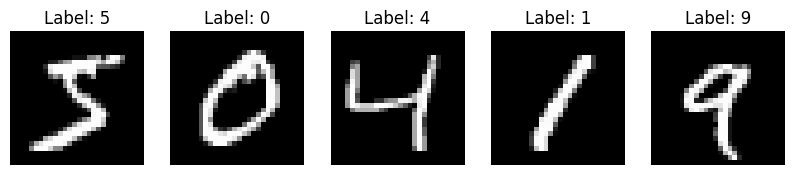

In [214]:
# Visualize the first 5 images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

In [215]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Experiments and Results

### KNN Algorithm

In [216]:
# Flatten images for K-NN
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)

In [217]:
# Implement K-NN with Grid Search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": [3, 5, 7]}
grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train_flatten, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]})

In [218]:
# Get the best model
best_knn_model = grid_search.best_estimator_

In [219]:
# Evaluate on validation set
from sklearn.metrics import accuracy_score, confusion_matrix

y_val_pred = best_knn_model.predict(X_val_flatten)
accuracy_knn = accuracy_score(y_val, y_val_pred)
conf_matrix_knn = confusion_matrix(y_val, y_val_pred)

In [220]:
print(f"Accuracy (K-NN): {accuracy_knn}")
print("Confusion Matrix (K-NN):\n", conf_matrix_knn)

Accuracy (K-NN): 0.9726666666666667
Confusion Matrix (K-NN):
 [[1167    0    1    0    1    1    2    1    1    1]
 [   0 1318    1    0    0    0    0    2    0    1]
 [   7   11 1133    1    3    1    0   15    2    1]
 [   1    0    8 1181    0   14    0    3    6    6]
 [   1    7    1    1 1135    0    1    4    0   26]
 [   7    4    0   13    2 1067    7    0    3    1]
 [   3    3    0    0    1    3 1167    0    0    0]
 [   0   19    2    0    2    0    0 1269    2    5]
 [   3    9    8   17    9   16    2    2 1089    5]
 [   4    4    2    2   18    2    2   13    1 1146]]


### Artificial Neural Network (ANN):

In [221]:
# Flatten images for ANN
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)

In [222]:
# Define and train ANN
# from tensorflow import keras
# from tensorflow.keras import layers
import keras
from keras import layers


model = keras.Sequential(
    [
        layers.Flatten(input_shape=(784,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_unique_classes, activation="softmax"),
    ]
)

In [223]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    X_train_flatten,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_flatten, y_val),
)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2849 - accuracy: 0.9179 - val_loss: 0.1646 - val_accuracy: 0.9507
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1256 - accuracy: 0.9631 - val_loss: 0.1049 - val_accuracy: 0.9692
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9746 - val_loss: 0.0946 - val_accuracy: 0.9712
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0956 - val_accuracy: 0.9705
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0856 - val_accuracy: 0.9753
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0814 - val_accuracy:

In [224]:
# Evaluate on validation set
accuracy_ann = model.evaluate(X_val_flatten, y_val)[1]

print(f"Accuracy (ANN): {accuracy_ann}")

375/375 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9777
Accuracy (ANN): 0.9776666760444641


In [225]:
# Get confusion matrix for ANN
y_val_pred_ann_probs = model.predict(X_val_flatten)
y_val_pred_ann = np.argmax(y_val_pred_ann_probs, axis=1)
conf_matrix_ann = confusion_matrix(y_val, y_val_pred_ann)
print("Confusion Matrix (ANN):\n", conf_matrix_ann)

375/375 [==============================] - 0s 1ms/step
Confusion Matrix (ANN):
 [[1155    1    2    0    1    2    5    1    7    1]
 [   0 1315    1    1    1    0    2    0    1    1]
 [   1    7 1143    4    2    1    2    6    7    1]
 [   0    0   14 1171    0   20    0    1   12    1]
 [   1    1    0    1 1162    1    1    0    1    8]
 [   4    0    1    4    2 1078    6    0    7    2]
 [   0    1    0    0    1    2 1168    0    5    0]
 [   0   13    7    3    7    1    0 1257    6    5]
 [   1    5    2    0    3    6    5    1 1134    3]
 [   7    1    0    2   16    8    0    5    6 1149]]


In [226]:
# Save the best model
model.save("best_model.h5")

c:\Users\Amr Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load and Evaluate the Best Model on Testing Data

In [227]:
mnist_test_data = pd.read_csv("mnist_test.csv")
mnist_test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
# Extract labels and pixel values
X_test = mnist_test_data.iloc[:, 1:]
y_test = mnist_test_data["label"]

In [229]:
# Normalize and reshape images
X_test = X_test / 255.0
X_test = X_test.values.reshape(-1, 28, 28)

In [230]:
# Flatten images for both K-NN and ANN
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [231]:
# Load the best ANN model
loaded_model = keras.models.load_model("best_model.h5")

In [232]:
# Evaluate on test set
accuracy_test = loaded_model.evaluate(X_test_flatten, y_test)[1]
print(f"Accuracy on Test Set: {accuracy_test}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9775
Accuracy on Test Set: 0.9775000214576721


In [233]:
# Use the loaded model to predict on the test set
y_test_pred_probs = loaded_model.predict(X_test_flatten)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

313/313 [==============================] - 0s 1ms/step


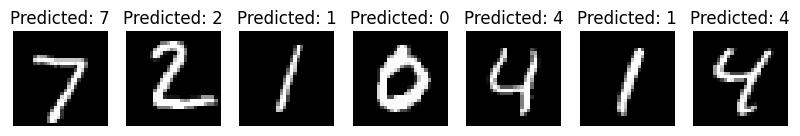

In [246]:
# Visualize a few test images along with their predicted labels
plt.figure(figsize=(10, 2))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Predicted: {y_test_pred[i]}")
    plt.axis("off")
plt.show()